<h1 style="text-align: center;">Machine Learning Exercise 8 - PCA From Scratch </h1>
<h2 style="text-align: center;">Ajay Badrinath</h2>
<h3 style="text-align: center;">21011102020</h3>


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Generic Class to perform PCA 
        Note : I am not implementing Cov /eig from  scratch to save time!

In [2]:
class PCA:
    
    def __init__(self,data,n_components):
        self.data=data
        self.n_components=n_components
        self.compute()
        
    def compute(self):
        cov=np.cov(self.data,rowvar=False)
        self.eig_val,self.eig_v=np.linalg.eigh(cov)
        sorted_idx=np.argsort(self.eig_val)[::-1]
        self.eig_val=self.eig_val[sorted_idx]
        self.eig_v=self.eig_v[:,sorted_idx]
        
    def fit_transform(self):
        tmp= np.dot(self.data,self.eig_v[:,:self.n_components])
        return tmp/np.sqrt(self.eig_val[:self.n_components])
    

#### Importing MNIST Digit Data

In [3]:
train=pd.read_csv(r'E:\Machine Learning Algorithms\Ex7 PCA\train.csv')
y=y=train.iloc[:,0]

### Data Normalised to 0->1 dividing by 255.0 (val changes from 0 to 255)

In [4]:
df=train.iloc[:,1:]/255.0

In [33]:
x=PCA(df,2)
dp=x.fit_transform()

In [34]:
dp

array([[-0.17929209, -1.41068277],
       [-4.26335393, -0.72751754],
       [ 0.21009223, -0.59283296],
       ...,
       [-1.9039064 ,  1.91545772],
       [-1.88857534,  0.12466016],
       [-0.69319706,  0.84436166]])

In [28]:
data_label

,PCA1,PCA2,label
0,-0.179292,-1.410683,1
1,-4.263354,-0.727518,0
2,0.210092,-0.592833,1
3,-1.036254,0.604963,4
4,-4.647483,-0.906197,0
...,...,...,...
41995,-2.636854,-0.504278,0
41996,0.509052,-0.610028,1
41997,-1.903906,1.915458,7
41998,-1.888575,0.124660,6


#### Visualizing the 2d PCA Features using Seaborn

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

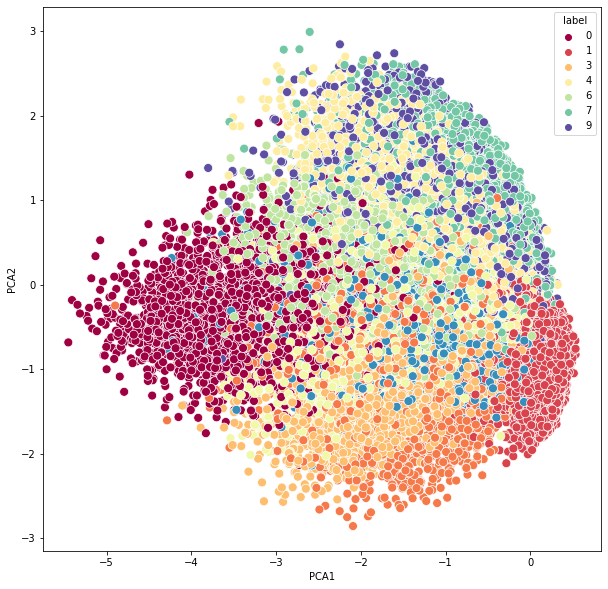

In [35]:
data=pd.DataFrame(dp,columns=['PCA1','PCA2'])
data_label=pd.concat([data,pd.DataFrame(y)],axis=1)# Concat along columns
plt.figure(figsize=(10,10))
sns.scatterplot(data=data_label,x='PCA1',y='PCA2',hue=y,s=80,palette='Spectral')

#### References:
######             https://www.askpython.com/python/examples/principal-component-analysis 
######            https://www.kaggle.com/c/digit-recognizer/data
######            https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html
######             https://seaborn.pydata.org/generated/seaborn.scatterplot.html
    